In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
import mjoindices.olr_handling as olr
import mjoindices.omi.wheeler_kiladis_mjo_filter

In [13]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\new2.nc')
ds = f.__xarray_dataarray_variable__



oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)



new_ds = xr.merge([NDJ,oni.to_xarray()],join='inner')
print(new_ds)
Elnino = new_ds['__xarray_dataarray_variable__'].loc[new_ds['NDJ']>0.5].mean(axis=0)
Lanina = new_ds['__xarray_dataarray_variable__'].loc[new_ds['NDJ']<-0.5].mean(axis=0)
lat = new_ds['lat']
lon = new_ds['lon']

<xarray.DataArray '__xarray_dataarray_variable__' (time: 564, lat: 25, lon: 144)>
array([[[-5.39476108e+00, -5.36448480e+00, -5.46593359e+00, ...,
         -5.94400697e+00, -5.42601808e+00, -5.02130798e+00],
        [-5.99685560e+00, -5.50432618e+00, -6.67693892e+00, ...,
         -7.17629481e+00, -6.43143146e+00, -5.66105077e+00],
        [-7.16404313e+00, -6.88085088e+00, -6.56790790e+00, ...,
         -6.42435321e+00, -6.41145824e+00, -6.91716572e+00],
        ...,
        [ 4.33356376e-01,  1.88701746e-01,  4.65931608e-01, ...,
          1.98648153e+00,  1.56565087e+00,  8.08803770e-01],
        [ 1.78052584e+00,  9.88427080e-01,  1.35850670e+00, ...,
          2.13565199e+00,  2.02076169e+00,  2.19745442e+00],
        [ 3.45299082e+00,  2.68247908e+00,  1.97126118e+00, ...,
          3.29491052e+00,  3.01245114e+00,  2.74516722e+00]],

       [[ 1.12367587e+00,  6.68798903e-01,  4.92648522e-01, ...,
          1.13561743e+00,  1.50830860e+00,  7.21443292e-01],
        [ 1.63205941e

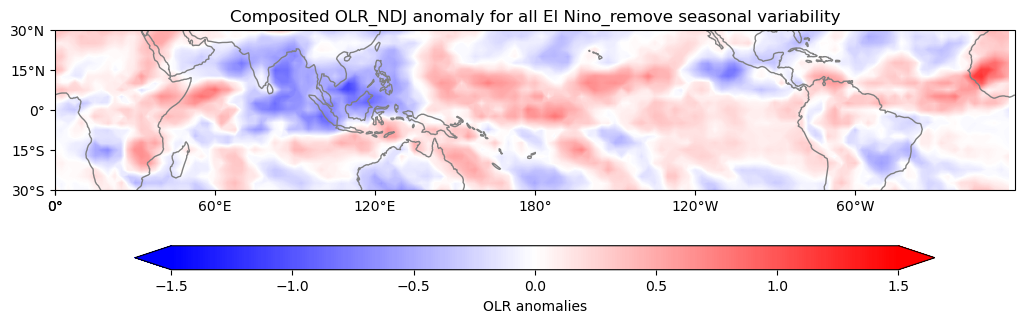

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all El Nino_remove seasonal variability')

c = ax.contourf(lon,lat,Elnino,
                levels=np.arange(-1.5,1.51,0.01),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-1.5,1.6,0.5),
             shrink=0.7)

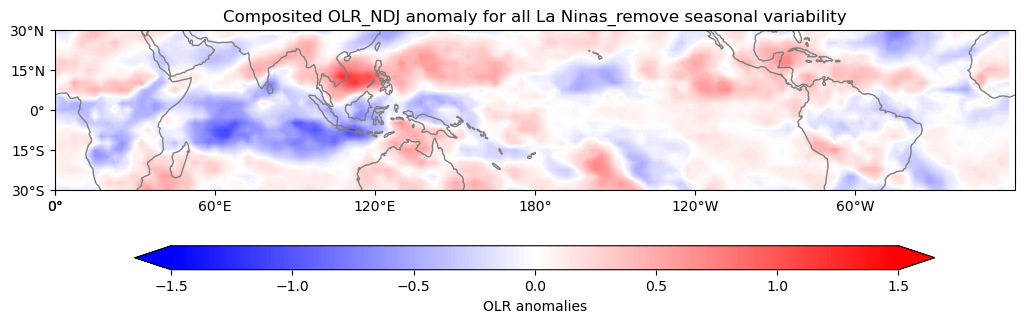

In [27]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all La Ninas_remove seasonal variability')

c = ax.contourf(lon,lat,Lanina,
                levels=np.arange(-1.5,1.51,0.01),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder=0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-1.5,1.6,0.5),
             shrink=0.7)